# Tech Challenge - Fase 2

**Otimização de Rede Neural com Algoritmo Genético + Visualização**

Projeto individual - Luís Felipe Alves Silva (RM: 363734)

## 1. Importações

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## 2. Dados e Normalização

In [ ]:
iris = load_iris()
X = iris.data
y = to_categorical(iris.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Configurações do GA

In [ ]:
POPULATION_SIZE = 10
GENERATIONS = 10
MUTATION_RATE = 0.1
ACT_FUNCS = ['relu', 'sigmoid', 'tanh']

## 4. Funções principais do GA

In [ ]:
def decode_individual(ind):
    neurons_1 = ind[0]
    neurons_2 = ind[1]
    act1 = ACT_FUNCS[ind[2]]
    act2 = ACT_FUNCS[ind[3]]

    model = Sequential()
    model.add(Dense(neurons_1, activation=act1, input_shape=(4,)))
    model.add(Dense(neurons_2, activation=act2))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, verbose=0)
    acc = model.evaluate(X_test, y_test, verbose=0)[1]
    return acc

In [ ]:
def create_individual():
    return [random.randint(4, 64), random.randint(4, 64), random.randint(0, 2), random.randint(0, 2)]

def mutate(ind):
    i = random.randint(0, 3)
    if i < 2:
        ind[i] = random.randint(4, 64)
    else:
        ind[i] = random.randint(0, 2)

def crossover(p1, p2):
    cut = random.randint(1, 3)
    return p1[:cut] + p2[cut:], p2[:cut] + p1[cut:]

## 5. Execução do GA + Registro da Acurácia

In [ ]:
population = [create_individual() for _ in range(POPULATION_SIZE)]
historico_melhores = []

for generation in range(GENERATIONS):
    fitness = [decode_individual(ind) for ind in population]
    melhor_geracao = max(fitness)
    historico_melhores.append(melhor_geracao)
    print(f'Geração {generation + 1} - Melhor acurácia: {melhor_geracao:.4f}')
    selected = [population[i] for i in np.argsort(fitness)[-POPULATION_SIZE//2:]]
    children = []
    while len(children) < POPULATION_SIZE:
        p1, p2 = random.sample(selected, 2)
        c1, c2 = crossover(p1, p2)
        if random.random() < MUTATION_RATE:
            mutate(c1)
        if random.random() < MUTATION_RATE:
            mutate(c2)
        children.extend([c1, c2])
    population = children[:POPULATION_SIZE]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Geração 1 - Melhor acurácia: 0.9667
Geração 2 - Melhor acurácia: 0.9667
Geração 3 - Melhor acurácia: 1.0000
Geração 4 - Melhor acurácia: 1.0000
Geração 5 - Melhor acurácia: 1.0000
Geração 6 - Melhor acurácia: 1.0000
Geração 7 - Melhor acurácia: 1.0000
Geração 8 - Melhor acurácia: 1.0000
Geração 9 - Melhor acurácia: 1.0000
Geração 10 - Melhor acurácia: 1.0000


## 6. Visualização da Evolução da Acurácia

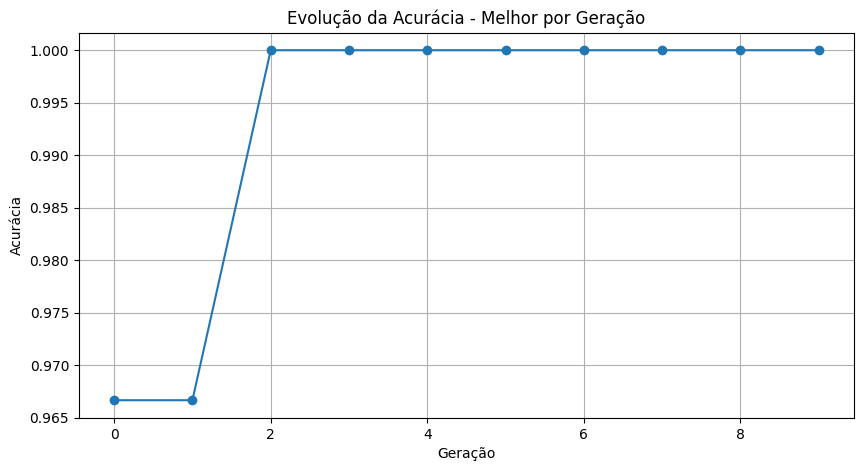

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(historico_melhores, marker='o')
plt.title('Evolução da Acurácia - Melhor por Geração')
plt.xlabel('Geração')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()